In [1]:
# -*- coding: utf-8 -*-
#%% NumPyの読み込み
import numpy as np
#   NumPyのPolynomialモジュールの読み込み
import numpy.polynomial.polynomial as pol
#   NumPyのLinalgモジュールの読み込み
import numpy.linalg as lin
#   MatplotlibのPyplotモジュールの読み込み
import matplotlib.pyplot as plt
#   日本語フォントの設定
from matplotlib.font_manager import FontProperties
import sys
if sys.platform.startswith('win'):
    FontPath = 'C:\\Windows\\Fonts\\meiryo.ttc'
elif sys.platform.startswith('darwin'):
    FontPath = '/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc'
elif sys.platform.startswith('linux'):
    FontPath = '/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf'
jpfont = FontProperties(fname=FontPath)
#%% 債券利回りの計算
def Bond_Yield(Price, Maturity, CouponRate, FaceValue):
    #      Price: 債券価格
    #   Maturity: 残存期間
    # CouponRate: 表面利率 (%)
    #  FaceValue: 額面
    #     Output: 債券利回り (%)
    Coupon = 0.01 * CouponRate * FaceValue
    CF = np.r_[-Price, np.tile(Coupon, int(Maturity) - 1), FaceValue + Coupon]
    Roots = pol.polyroots(CF)
    Real = np.real(Roots[np.isreal(Roots)])
    Positive = np.asscalar(Real[Real > 0.0])
    return (1.0 / Positive - 1.0) * 100
#%% 債券の利回り曲線
#   債券データ: 1列目-市場価格，2列目-残存期間，3列目-表面利率
Bond = np.array([
    [ 99.90,  1, 2.0],
    [100.10,  2, 2.3],
    [100.66,  3, 2.6],
    [ 99.77,  4, 2.4],
    [ 98.38,  5, 2.2],
    [ 96.00,  6, 1.9],
    [ 93.70,  7, 1.7],
    [ 95.32,  8, 2.1],
    [ 95.21,  9, 2.2],
    [ 97.00, 10, 2.5]
])
F = 100
#   利付債利回りの計算
Yield = np.array([Bond_Yield(Bond[idx,0], Bond[idx,1], Bond[idx,2], F)
                  for idx in range(0, Bond.shape[0])])
#   割引債利回りの計算
P = Bond[:,0]
C = F * np.identity(Bond.shape[0]) \
    + np.tril(np.transpose(np.tile(0.01 * Bond[:, 2] * F, (Bond.shape[0], 1))))
V = lin.solve(C, P)
ZeroRate = (np.power(1.0 / V, 1.0 / Bond[:, 1]) - 1.0) * 100
#   利回り曲線のグラフの作成
fig1 = plt.figure(1, facecolor='w')
plt.plot(Bond[:,1], ZeroRate, 'k-')
plt.plot(Bond[:,1], Yield, 'k--')
plt.xlabel(u'残存期間', fontproperties=jpfont)
plt.ylabel(u'利回り', fontproperties=jpfont)
plt.legend([u'割引債の利回り曲線', u'利付債の利回り曲線'], loc='best',
           frameon=False, prop=jpfont)
plt.show()


<Figure size 640x480 with 1 Axes>

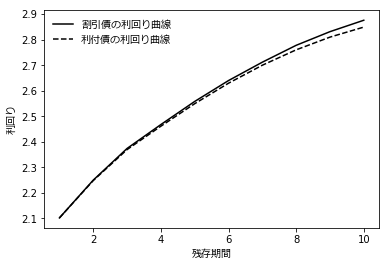

In [2]:
# -*- coding: utf-8 -*-
#%% NumPyの読み込み
import numpy as np
#   NumPyのPolynomialモジュールの読み込み
import numpy.polynomial.polynomial as pol
#   NumPyのLinalgモジュールの読み込み
import numpy.linalg as lin
#   MatplotlibのPyplotモジュールの読み込み
import matplotlib.pyplot as plt
#   日本語フォントの設定
from matplotlib.font_manager import FontProperties
import sys
if sys.platform.startswith('win'):
    FontPath = 'C:\\Windows\\Fonts\\meiryo.ttc'
elif sys.platform.startswith('darwin'):
    FontPath = '/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc'
elif sys.platform.startswith('linux'):
    FontPath = '/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf'
jpfont = FontProperties(fname=FontPath)
#%% 債券利回りの計算
def Bond_Yield(Price, Maturity, CouponRate, FaceValue):
    #      Price: 債券価格
    #   Maturity: 残存期間
    # CouponRate: 表面利率 (%)
    #  FaceValue: 額面
    #     Output: 債券利回り (%)
    Coupon = 0.01 * CouponRate * FaceValue
    CF = np.r_[-Price, np.tile(Coupon, int(Maturity) - 1), FaceValue + Coupon]
    Roots = pol.polyroots(CF)
    Real = np.real(Roots[np.isreal(Roots)])
    Positive = np.asscalar(Real[Real > 0.0])
    return (1.0 / Positive - 1.0) * 100
#%% 債券の利回り曲線
#   債券データ: 1列目-市場価格，2列目-残存期間，3列目-表面利率
Bond = np.array([
    [ 99.90,  1, 2.0],
    [100.10,  2, 2.3],
    [100.66,  3, 2.6],
    [ 99.77,  4, 2.4],
    [ 98.38,  5, 2.2],
    [ 96.00,  6, 1.9],
    [ 93.70,  7, 1.7],
    [ 95.32,  8, 2.1],
    [ 95.21,  9, 2.2],
    [ 97.00, 10, 2.5]
])
F = 100
#   利付債利回りの計算
Yield = np.array([Bond_Yield(Bond[idx,0], Bond[idx,1], Bond[idx,2], F)
                  for idx in range(0, Bond.shape[0])])
#   割引債利回りの計算
P = Bond[:,0]
C = F * np.identity(Bond.shape[0]) \
    + np.tril(np.transpose(np.tile(0.01 * Bond[:, 2] * F, (Bond.shape[0], 1))))
V = lin.solve(C, P)
ZeroRate = (np.power(1.0 / V, 1.0 / Bond[:, 1]) - 1.0) * 100
#   利回り曲線のグラフの作成
fig1 = plt.figure(1, facecolor='w')
plt.plot(Bond[:,1], ZeroRate, 'k-')
plt.plot(Bond[:,1], Yield, 'k--')
plt.xlabel(u'残存期間', fontproperties=jpfont)
plt.ylabel(u'利回り', fontproperties=jpfont)
plt.legend([u'割引債の利回り曲線', u'利付債の利回り曲線'], loc='best',
           frameon=False, prop=jpfont)
plt.show()

In [3]:
Bond.shape

(10, 3)

In [4]:
Bond.shape[0]

10